# Topic Modeling


At the document level, a useful ways to understand the text is by analysing its topics. Topic Modelling is the process of learning, recognising and extracting the topics across a collection of documents. This notebook tries to uncover topics from blockchain whitepapers that is relevant to Schungrat in-terms of investment dimensions.

The notebook explores some of the methods of Topic Modelling such as ***Non-negative Matrix Factorization*** & ***Latent Dirichlet Allocation*** to see which fits better. Rather than being conceptual or mathematical, this notebook offers an applied approach with comments for the codes.


## Library Imports

In [1]:
%reset -f
# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

# Import own functions
from libraries import corpus
from libraries import pdf2text
import spacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm', disable =['parser', 'ner'])
import re, numpy as np, pandas as pd
from pprint import pprint

#gensim
import gensim
import gensim, spacy, logging, warnings
from gensim import corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

import matplotlib.pyplot as plt
%matplotlib notebook

#nltk
import nltk as nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
from nltk.stem.wordnet import WordNetLemmatizer
import string

#other imports
import warnings
from importlib import reload
warnings.filterwarnings("ignore", category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

## Data Preprocessing

In [2]:
#import dataset
reload(corpus)

<module 'libraries.corpus' from 'C:\\Users\\sj\\Documents\\GitHub\\datascience_project\\libraries\\corpus.py'>

In [5]:
#Retrieving the PDF files from white-paper folder and converting them to text
dataset = pdf2text.get_dataset()

In [6]:
dataset.keys()

dict_keys(['#metahash', '0x', 'abbccoin', 'aion', 'apollocurrency', 'ardor', 'ark', 'basicattentiontoken', 'bhpcoin', 'binancecoin', 'bitcoin', 'bitcoingold', 'bitshares', 'bittorrent', 'bytecoin', 'bytom', 'celernetwork', 'chainlink', 'cosmocoin', 'cosmos', 'crypto', 'cryptonex', 'dai', 'dash', 'decentraland', 'dent', 'digixdao', 'dogecoin', 'elastos', 'enjincoin', 'eos', 'ethereum', 'ethereumclassic', 'factom', 'fantom', 'gnosis', 'golem', 'gxchain', 'holo', 'horizen', 'hypercash', 'hyperion', 'icon', 'iexecrlc', 'inocoin', 'iota', 'japancontenttoken', 'komodo', 'latoken', 'lina', 'loopring', 'maidsafecoin', 'maker', 'metal', 'metaverseetp', 'mixin', 'monero', 'nano', 'nebulas', 'nem', 'nexo', 'nkn', 'obyte', 'omisego', 'ontology', 'orbs', 'particl', 'paxosstandardtoken', 'powerledger', 'pundix', 'ravencoin', 'riftoken', 'siacoin', 'singularitynet', 'skycoin', 'solve', 'status', 'steem', 'stellar', 'stratis', 'synthetixnetworktoken', 'tenx', 'tether', 'tezos', 'theta', 'thetafuel', '

In [12]:
#corpora segregated in terms of sentences 
corpora = corpus.makeCleanCorpus(dataset, lemmatize=True, removePunct=True, removeNums=True, makeSentences=True, removeURL=True, removeChar= True, stops=['\u200b'] )

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: #metahash
Cleaning: 0x
Cleaning: abbccoin
Cleaning: aion
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: bhpcoin
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bittorrent
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: cosmocoin
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning: dogecoin
Cleaning: elastos
Cleaning: enjincoin
Cleaning: eos
Cleaning: ethereum
Cleaning: ethereumclassic
Cleaning: factom
Cleaning: fantom
Cleaning: gnosis
Cleaning: golem
Cleaning: gxchain
Cleaning: holo
Cleaning: horizen
Cleaning: hypercash
Cleaning: hyperion
Cleaning: icon
Cleaning: iexecrlc
Cleaning: inocoin
Cleaning: iota
Cleaning: japancontenttoken
Cleaning: komodo
Cleaning: latoken
Cleaning: lina
Cleaning: loopring
Cleaning: maidsafecoin
Cleaning: maker
Cleaning: met

In [13]:
#Corpora not segregated with sentences
corpora_whole = corpus.makeCleanCorpus(dataset, lemmatize=True, removePunct=True, removeNums=True, makeSentences= False, removeURL=True, removeChar= True, stops=['\u200b'] )

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: #metahash
Cleaning: 0x
Cleaning: abbccoin
Cleaning: aion
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: bhpcoin
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bittorrent
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: cosmocoin
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning: dogecoin
Cleaning: elastos
Cleaning: enjincoin
Cleaning: eos
Cleaning: ethereum
Cleaning: ethereumclassic
Cleaning: factom
Cleaning: fantom
Cleaning: gnosis
Cleaning: golem
Cleaning: gxchain
Cleaning: holo
Cleaning: horizen
Cleaning: hypercash
Cleaning: hyperion
Cleaning: icon
Cleaning: iexecrlc
Cleaning: inocoin
Cleaning: iota
Cleaning: japancontenttoken
Cleaning: komodo
Cleaning: latoken
Cleaning: lina
Cleaning: loopring
Cleaning: maidsafecoin
Cleaning: maker
Cleaning: met

In [15]:
# Add ALL the documents into one single array
final = []
for k in corpora.keys():
    for i in corpora[k]:
        final += [i]
len(final)

42704

In [16]:
#Our dictionary at the moment is in key: blockchain firms, value: list of text of whitepapers
#We change this to key: blockchain firms and value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [17]:
#Combining then
data_combined = {key:[combine_text(value)] for (key, value) in corpora.items()}

In [18]:
#Putting the text into pandas dataframe
import pandas as pd
pd.set_option('max_colwidth', 150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['whitepapers']
data_df = data_df.sort_index()

In [19]:
#Glancing into the dataframe; it is a dataframe with each row representing a document (blockchain whitepaper)
data_df.head(10)

,whitepapers
#metahash,yellow paper technical documentation version gartenstrasse yellow paper project goal technical feature test methodology test building nerk test ...
0x,open protocol decentralize exchange blockchain projectcom protocol facilitates low friction peertopeer exchange erc token blockchain protocol int...
abbccoin,concept reference purpose project summary iii ecosystem scope create content advantage business technology opportunity opportunity futu...
aion,white paper enable decentralize internet mattaionnerk engineering team aionnucoio release v mainstream adoption blockchain limited unsolved questi...
apollocurrency,ultimate currency privacy mission content introduction apollo offer absolute freedom total control alternative decentralize framework landscape g...
ardor,jeluridawpicov content executive summary history iii technological overview business talk accountability contribution testimonial team suppor...
ark,ecosystem doc ecosystem version ecosystem doc ecosystem empowers aim technical background easily leverage blockchain technology identify problem...
basicattentiontoken,basic attention oftware digital advertising broken marketplace online advertising domi nated advertiser publisher user overrun middleman exchange...
bhpcoin,distribute payment base credit payment github outline summary payment architecture ...
binancecoin,exchange intro problem exchange match engine feature rollout coin device coverage multilingual support preview revenue model coin allocation sched...


In [20]:
#Pickling the data for future use. 
import pickle
data_df.to_pickle('tmcorpus.pkl')

In [21]:
import pickle
with open('tmcorpus.pkl', 'rb') as f:
    data_df = pickle.load(f)

### Document-Term Matrix

Since the goal of this notebook is Topic Modelling, the text must be tokenized which means broken down to small pieces which here is words. We use scikit-learn's CountVectorizer technique where every row represents a different document and every column will represent a different word. 

At this moment, stop words are also removed thanks to CountVectorizer. Stop words are common words that seldom adds meaning or value to the text. 


In [73]:
#Creating a document-term matrix using CountVectorizer, and removing common english stop words. 

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words ='english')
data_cv = cv.fit_transform(data_df.whitepapers)
data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_dtm.index = data_df.index
vocab = cv.get_feature_names()

In [27]:
#we also make another document term matrix with tf-idfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
data_tv = tv.fit_transform(data_df.whitepapers)
data_dtm_tfidf = pd.DataFrame(data_tv.toarray(), columns = tv.get_feature_names())
data_dtm_tfidf.index = data_df.index

In [28]:
#pickling the document-term matrix both countvectorizer and tfidfvectorizer
data_dtm.to_pickle('dtm.pkl')
data_dtm_tfidf.to_pickle('dtm_tfidf.pkl')


In [61]:
#Trying LDA and NMF from scikit-learn
from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 5
#Run NMF

nmf =  NMF(n_components = no_topics, random_state = 1, alpha = .00001, l1_ratio = .5, init='nndsvd').fit(data_dtm_tfidf)
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(data_dtm)


In [62]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = cv.get_feature_names()
    
    word_dict = {};
    for i in range(no_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-10 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [63]:
#getting the topics from the first iteration with NMF
get_nmf_topics(nmf, 5)


,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,databased,nomic,assetissuefee,tokens,signups
1,blockchainbacked,blockchainagnostic,tokens,plead,keyvalue
2,severance,transferamount,contractstoragea,uservisible,transferamount
3,applicationlevel,nest,digitization,markup,blockchainagnostic
4,temperature,consensys,transferamount,paytopublickey,overcentralized
5,deviation,chainlink,blockchainbacked,exchangesthat,riskfree
6,uservisible,account,smoothly,cryptoeconomy,publisher
7,communityoriented,statista,chainlink,feegenerating,timescale
8,nest,blockchainbacked,startup,wary,address
9,busy,guild,cryptoboxseal,cardwallet,uservisible


In [74]:
#display topics from lda(scikit-learn)

topic_words = {}

for topic, comp in enumerate(lda.components_):)    
    word_idx = np.argsort(comp)[::-1][:no_topics]

    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]

In [75]:
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  transaction, node, nerk, token, block
Topic: 1
  transaction, token, node, block, data
Topic: 2
  transaction, node, nerk, block, time
Topic: 3
  transaction, blockchain, user, node, key
Topic: 4
  data, user, nerk, blockchain, token


In [77]:
#importing necessary modules for LDA with gensim
from gensim import matutils, models
import scipy.sparse
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO)

In [80]:
#importing the term-document matrix and converting it into document-term matrix with transpose

tdm = data_dtm.transpose()
tdm.head(2)

,#metahash,0x,abbccoin,aion,apollocurrency,ardor,ark,basicattentiontoken,bhpcoin,binancecoin,...,usdcoin,utrust,vechain,waltonchain,wanchain,waves,wax,xrp,zcash,zilliqa
aaab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaafdfddddcaf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [81]:
tdm_tfidf = data_dtm_tfidf.transpose()
tdm_tfidf.head(2)

,#metahash,0x,abbccoin,aion,apollocurrency,ardor,ark,basicattentiontoken,bhpcoin,binancecoin,...,usdcoin,utrust,vechain,waltonchain,wanchain,waves,wax,xrp,zcash,zilliqa
aaab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
aaafdfddddcaf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001744,0.0


In [82]:
#Converting the term-document matrix into gensim corpus format which follows a sequence from dataframe to sparse matrix to gensim corpus
sparse_docs = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_docs)
corpus_tfidf = matutils.Sparse2Corpus(sparse_docs)

In [83]:
#Creating term dictionary of our corpus, where every unique term is assigned an index
id2word = dict((v, k) for k, v in cv.vocabulary_.items())
id2word_tfidf = dict((v, k) for k, v in tv.vocabulary_.items())

In [84]:
print(id2word[20])
print(id2word_tfidf[20])

abandon
abandon


In [86]:
#lda with countvectorizer
lda_gensim = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=21,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)


[(0,
  '0.020*"node" + 0.019*"transaction" + 0.017*"block" + 0.009*"key" + 0.007*"nerk" + 0.007*"hash" + 0.006*"time" + 0.006*"signature" + 0.006*"address" + 0.006*"protocol"'),
 (1,
  '0.014*"user" + 0.010*"nerk" + 0.010*"blockchain" + 0.010*"order" + 0.009*"transaction" + 0.009*"exchange" + 0.008*"node" + 0.008*"protocol" + 0.007*"process" + 0.007*"token"'),
 (2,
  '0.015*"asset" + 0.014*"chain" + 0.011*"node" + 0.011*"token" + 0.011*"transaction" + 0.008*"blockchain" + 0.008*"block" + 0.007*"nerk" + 0.006*"layer" + 0.006*"event"'),
 (3,
  '0.014*"token" + 0.012*"platform" + 0.009*"data" + 0.009*"user" + 0.008*"market" + 0.007*"technology" + 0.006*"development" + 0.006*"blockchain" + 0.006*"service" + 0.005*"business"'),
 (4,
  '0.011*"nerk" + 0.009*"blockchain" + 0.009*"user" + 0.008*"service" + 0.008*"data" + 0.007*"token" + 0.007*"transaction" + 0.006*"contract" + 0.006*"application" + 0.006*"provide"')]

In [94]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 10);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [95]:
get_lda_topics(lda_gensim, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,node,user,asset,token,nerk
1,transaction,nerk,chain,platform,blockchain
2,block,blockchain,node,data,user
3,key,order,token,user,service
4,nerk,transaction,transaction,market,data
5,hash,exchange,blockchain,technology,token
6,time,node,block,development,transaction
7,signature,protocol,nerk,blockchain,contract
8,address,process,layer,service,application
9,protocol,token,event,business,provide


As expected, most of the important topics seem to be around blockchain, transactions, token, protocol etc. Therefore, we use TFIDF to get the topics that are perhaps the important ones because it is then going to consider the words that are important based on the rarity of it in the entire dataset

In [88]:
#lda with tfidfvectorizer; not sure though because LDA is based on probability and tf-idf isn't. Need to consult.
lda_tfidf = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                           id2word=id2word_tfidf,
                                           num_topics=5, 
                                           random_state=21,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

[(0,
  '0.028*"nistimesyncnodelimit" + 0.021*"traders" + 0.019*"bloating" + 0.011*"negoaons" + 0.008*"account" + 0.007*"prospect" + 0.006*"consciously" + 0.006*"ticipating" + 0.006*"cfa" + 0.006*"blocchain"'),
 (1,
  '0.011*"optin" + 0.011*"kbps" + 0.009*"address" + 0.009*"traders" + 0.008*"unhealthily" + 0.008*"normalizemax" + 0.008*"harmless" + 0.007*"assembly" + 0.006*"bloating" + 0.006*"bird"'),
 (2,
  '0.014*"tmexdfwsiwppuqddbymwbtbea" + 0.010*"dare" + 0.009*"blocchain" + 0.009*"ure" + 0.007*"mapper" + 0.007*"placement" + 0.007*"assembly" + 0.007*"ser" + 0.006*"protocolhash" + 0.006*"continuity"'),
 (3,
  '0.015*"traders" + 0.010*"negoaons" + 0.009*"blocchain" + 0.008*"ser" + 0.007*"cfa" + 0.007*"ure" + 0.006*"nistimesyncnodelimit" + 0.005*"tmexdfwsiwppuqddbymwbtbea" + 0.005*"ticipating" + 0.005*"applicable"'),
 (4,
  '0.015*"nistimesyncnodelimit" + 0.012*"ure" + 0.011*"negoaons" + 0.010*"bloating" + 0.008*"proaches" + 0.008*"cfa" + 0.007*"consciously" + 0.007*"evaluation" + 0.007

In [96]:
get_lda_topics(lda_tfidf, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,nistimesyncnodelimit,optin,tmexdfwsiwppuqddbymwbtbea,traders,nistimesyncnodelimit
1,traders,kbps,dare,negoaons,ure
2,bloating,address,blocchain,blocchain,negoaons
3,negoaons,traders,ure,ser,bloating
4,account,unhealthily,mapper,cfa,proaches
5,prospect,normalizemax,placement,ure,cfa
6,consciously,harmless,assembly,nistimesyncnodelimit,consciously
7,ticipating,assembly,ser,tmexdfwsiwppuqddbymwbtbea,evaluation
8,cfa,bloating,protocolhash,ticipating,latoken
9,blocchain,bird,continuity,applicable,traders


Doesn't even makes sense. Will omit this!

## Visualization / Outcome

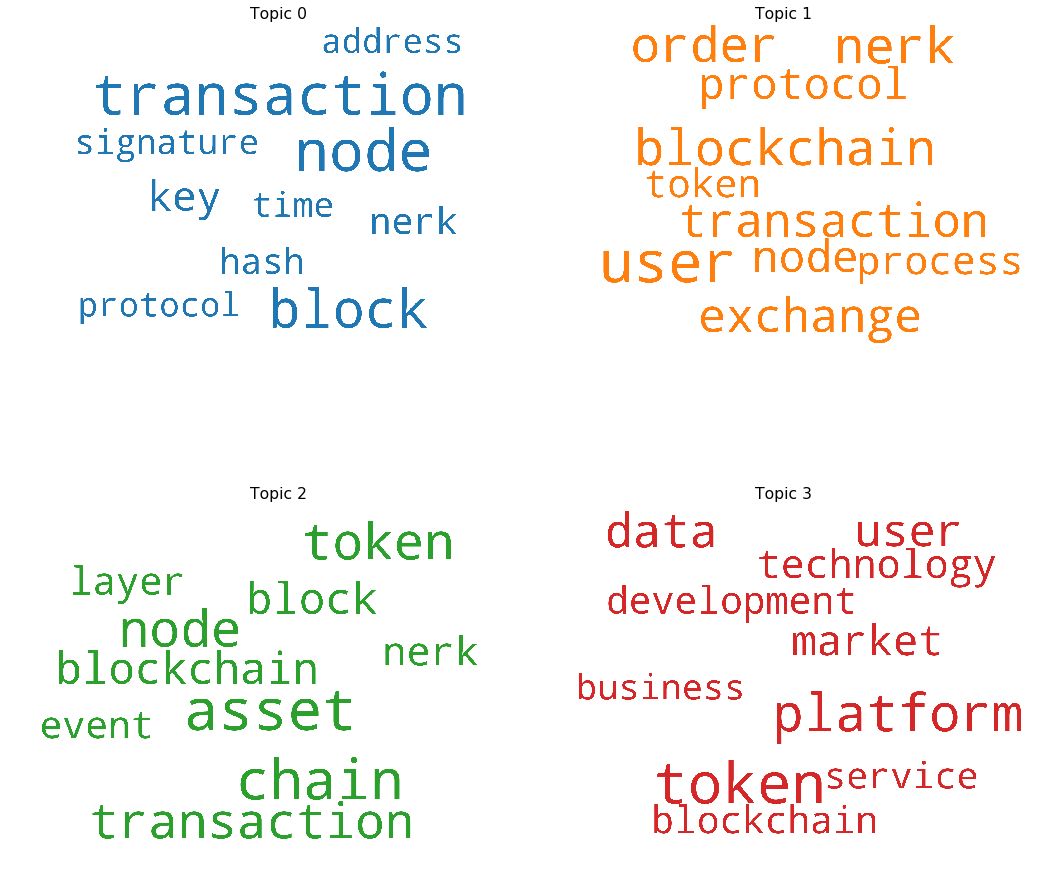

In [97]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_gensim.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(15,15), sharex=True, sharey=True, dpi = 70)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

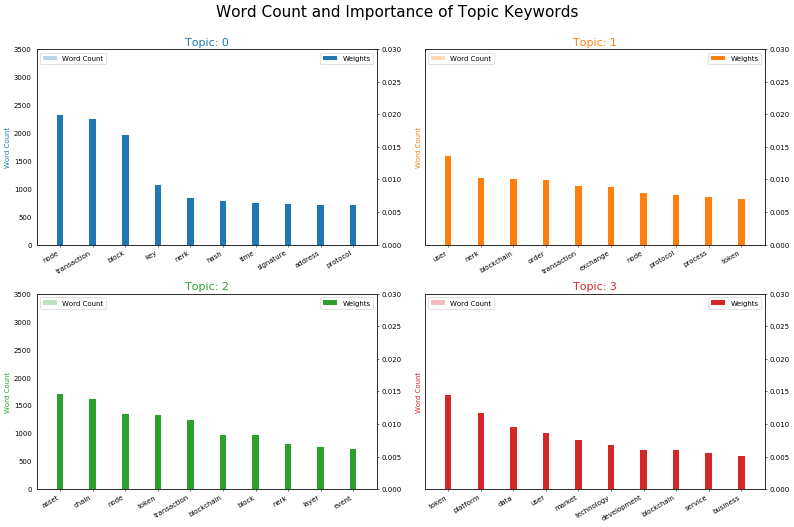

In [98]:
from collections import Counter
topics = lda_gensim.show_topics(formatted=False)
data_flat = [w for w_list in corpus for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=50)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [99]:
#Adding obvious words such as tokens, blockchain, node, transaction etc into stopwords 
from sklearn.feature_extraction import text
add_stop_words = ['tokens', 'token', 'blockchain', 'transactions', 'transaction', 'node', 'smart', 'public', 'protocol', 'nodes', 'bit', 'hash' 'key', 'nerk']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


In [100]:
#creating a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [101]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('tmcorpus.pkl')

In [102]:
# Apply the nouns function to the whitepapers to filter only on nouns
data_nouns = pd.DataFrame(data_clean.whitepapers.apply(nouns))

In [104]:
#Adding more stopwords
from sklearn.feature_extraction import text
add_stop_words = ['tokens', 'token', 'blockchain', 'transactions', 'transaction', 'node', 'nodes', 'smart', 'public', 'price', 'payment', 'block', 'chain', 'users', 'user', 'data', 'exchange']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.whitepapers)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn.head(10)

,aaab,aack,aacks,aaddrask,aael,aagreeesk,aagreeivk,aagreesk,aal,aas,...,zsnar,zsolt,zte,zverify,zverifyingey,zverifyrt,zverifyvkx,zviews,zxxxxxxxxxxxx,zygomys
#metahash,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0x,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbccoin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
apollocurrency,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ardor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
basicattentiontoken,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bhpcoin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
binancecoin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [107]:
# Let's start with 5 topics again
lda_tfidf_2 = gensim.models.ldamodel.LdaModel(corpus=corpusn,
                                           id2word=id2wordn,
                                           num_topics=5, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

[(0,
  '0.015*"note" + 0.011*"bit" + 0.011*"input" + 0.011*"oracle" + 0.010*"description" + 0.010*"commitment" + 0.009*"hash" + 0.008*"order" + 0.008*"output" + 0.008*"function"'),
 (1,
  '0.014*"market" + 0.010*"state" + 0.009*"platform" + 0.008*"time" + 0.008*"fee" + 0.007*"contract" + 0.006*"channel" + 0.006*"investment" + 0.006*"asset" + 0.006*"base"'),
 (2,
  '0.016*"service" + 0.015*"order" + 0.009*"time" + 0.009*"protocol" + 0.009*"event" + 0.008*"contract" + 0.008*"model" + 0.007*"process" + 0.007*"number" + 0.007*"layer"'),
 (3,
  '0.014*"asset" + 0.011*"technology" + 0.009*"application" + 0.009*"service" + 0.008*"platform" + 0.008*"contract" + 0.008*"business" + 0.007*"development" + 0.006*"process" + 0.006*"base"'),
 (4,
  '0.015*"consensus" + 0.014*"signature" + 0.014*"account" + 0.013*"protocol" + 0.012*"time" + 0.010*"message" + 0.008*"hash" + 0.008*"state" + 0.007*"vote" + 0.007*"number"')]

In [108]:
get_lda_topics(lda_tfidf_2, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,note,market,service,asset,consensus
1,bit,state,order,technology,signature
2,input,platform,time,application,account
3,oracle,time,protocol,service,protocol
4,description,fee,event,platform,time
5,commitment,contract,contract,contract,message
6,hash,channel,model,business,hash
7,order,investment,process,development,state
8,output,asset,number,process,vote
9,function,base,layer,base,number


In [109]:
top_topics = lda_tfidf_2.top_topics(corpus)
#Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics. 
avg_topic_coherence = sum([t[1] for t in top_topics]) / 10
print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

Average topic coherence: -10.8010.
[([(0.015785532, 'service'),
   (0.0145625565, 'order'),
   (0.009225235, 'time'),
   (0.008951225, 'protocol'),
   (0.008898291, 'event'),
   (0.008269092, 'contract'),
   (0.0077992007, 'model'),
   (0.0068682954, 'process'),
   (0.0067965286, 'number'),
   (0.0065335343, 'layer'),
   (0.0063546523, 'application'),
   (0.006097337, 'consensus'),
   (0.006027905, 'state'),
   (0.006017529, 'fee'),
   (0.005362779, 'consumer'),
   (0.0050116377, 'platform'),
   (0.004989871, 'nerk'),
   (0.0049643065, 'root'),
   (0.0049239714, 'base'),
   (0.0045254906, 'client')],
  -20.74187083316984),
 ([(0.014786565, 'consensus'),
   (0.013663016, 'signature'),
   (0.013516928, 'account'),
   (0.012706761, 'protocol'),
   (0.011795417, 'time'),
   (0.010469799, 'message'),
   (0.008259172, 'hash'),
   (0.008017281, 'state'),
   (0.0072160745, 'vote'),
   (0.007101308, 'number'),
   (0.006458919, 'contract'),
   (0.006079799, 'nerk'),
   (0.0053621046, 'process'),

In [110]:
# Compute Perplexity
print('\nPerplexity: ', lda_tfidf_2.log_perplexity(corpusn))  # a measure of how good the model is. lower the better.


Perplexity:  -7.331713715146423


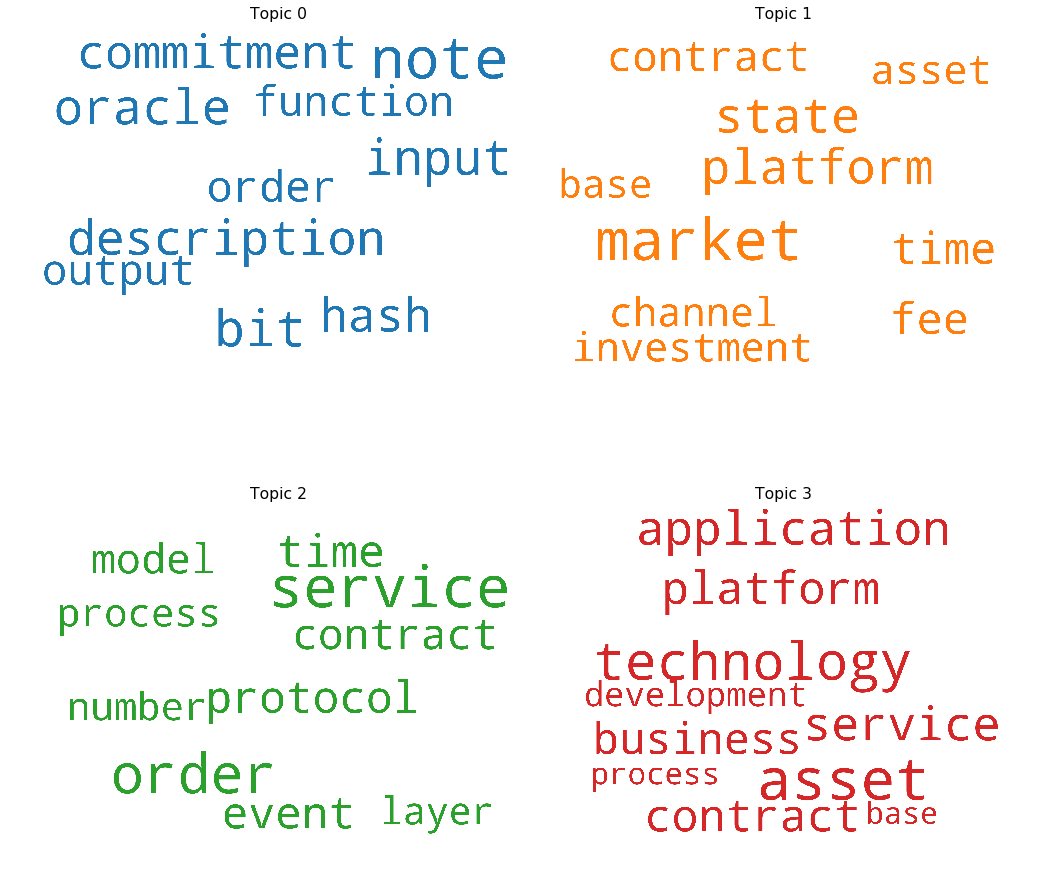

In [111]:
#Lets see how the top words differ
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_tfidf_2.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(15,15), sharex=True, sharey=True, dpi = 70)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [112]:
#getting tppic distributions
topic_dist = lda_tfidf_2.state.get_lambda()

num_words = 5

topic_terms = [{w for (w, _) in lda_tfidf_2.show_topic(topic, topn=num_words)} for topic in range(topic_dist.shape[0])]
pprint(topic_terms)

[{'bit', 'description', 'oracle', 'note', 'input'},
 {'platform', 'market', 'fee', 'state', 'time'},
 {'time', 'event', 'order', 'protocol', 'service'},
 {'technology', 'platform', 'application', 'asset', 'service'},
 {'account', 'consensus', 'protocol', 'signature', 'time'}]


### References:

https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/ 

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

https://github.com/susanli2016/NLP-with-Python/blob/master/LDA_news_headlines.ipynb

https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730

https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d

https://medium.com/@tomar.ankur287/topic-modeling-using-lda-and-gibbs-sampling-explained-49d49b3d1045

https://www.kdnuggets.com/2018/08/topic-modeling-lsa-plsa-lda-lda2vec.html

